In [1]:
from arcgis.features import *
from arcgis.gis import GIS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [2]:
#User defined inputs
initiative_id = 'b04ef2c7a77a43218b3e70dd75cc4f5e'
indicator_id = 'crime'

### Connect to your Hub and fetch indicator

In [3]:
gis = GIS("https://dc.mapsqa.arcgis.com", "username", "password")

In [4]:
myHub = gis.hub

In [5]:
data_inventory = myHub.initiatives.get(initiative_id)

In [6]:
crime_indicator = data_inventory.indicators.get(indicator_id)
crime_itemid = crime_indicator.itemid

In [7]:
crime_item = gis.content.get(crime_itemid)
crime_flayer = crime_item.layers[0]

# create a Spatially Enabled DataFrame object
crime = pd.DataFrame.spatial.from_layer(crime_flayer)

### Total crime incidents in 2017

In [8]:
print(crime.shape[0])

33082


### Bar chart for frequency of crime based on crime type

In [9]:
crime_indicator.mappings

[{'id': 'reported',
  'name': 'REPORT_DAT',
  'alias': 'REPORT_DATE',
  'type': 'esriFieldTypeDate'},
 {'id': 'boundary',
  'name': 'WARD',
  'alias': 'WARD',
  'type': 'esriFieldTypeString'},
 {'id': 'shift',
  'name': 'SHIFT',
  'alias': 'SHIFT',
  'type': 'esriFieldTypeString'},
 {'id': 'crimeType',
  'name': 'OFFENSE',
  'alias': 'OFFENSE',
  'type': 'esriFieldTypeString'}]

In [10]:
crimeType_columnName = next(field['name'] for field in crime_indicator.mappings if field['id'] == 'crimeType')
shift_columnName = next(field['name'] for field in crime_indicator.mappings if field['id'] == 'shift')
date_columnName = next(field['name'] for field in crime_indicator.mappings if field['id'] == 'reported')

In [11]:
#Frequency calculation of each crime type
counts = crime[crimeType_columnName].value_counts()
print(counts)

THEFT/OTHER                   14445
THEFT F/AUTO                  10259
MOTOR VEHICLE THEFT            2408
ROBBERY                        2170
ASSAULT W/DANGEROUS WEAPON     1856
BURGLARY                       1531
SEX ABUSE                       293
HOMICIDE                        115
ARSON                             5
Name: OFFENSE, dtype: int64


Text(0.5, 1.0, 'Types of crime based on frequency of occurence')

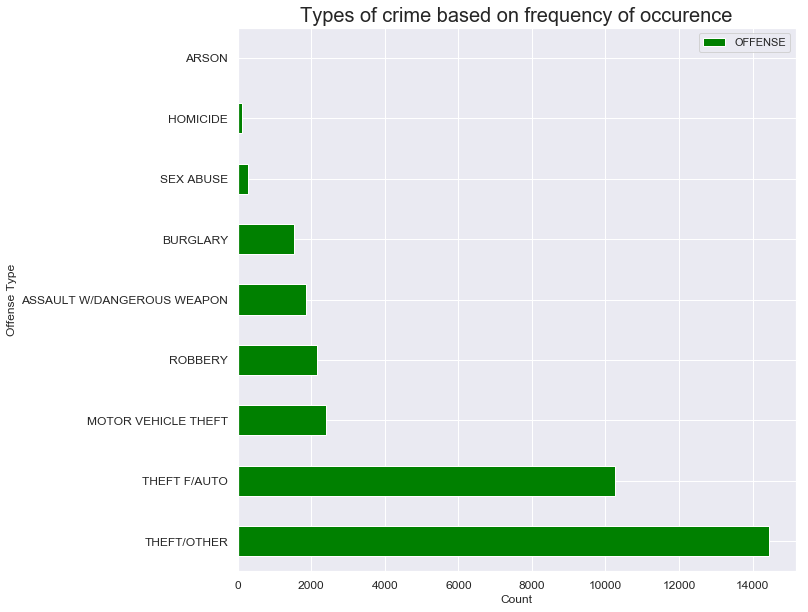

In [12]:
#Generates bar graph
ax = counts.plot(kind='barh', figsize=(10, 10), legend=True, fontsize=12, color='green')

#X axis text and display style of categories
ax.set_xlabel("Count", fontsize=12)
#plt.xticks(rotation=45)

#Y axis text
ax.set_ylabel("Offense Type", fontsize=12)

#Title
ax.set_title("Types of crime based on frequency of occurence", fontsize=20)

### Pie chart for day/night crime

In [13]:
#Getting unique values for shift
types = list(crime[shift_columnName].unique())
print(types)

['EVENING', 'DAY', 'MIDNIGHT']


In [14]:
#Frequency calculation of each shift type
sizes = crime['SHIFT'].value_counts()
print(sizes)

EVENING     14001
DAY         12188
MIDNIGHT     6893
Name: SHIFT, dtype: int64


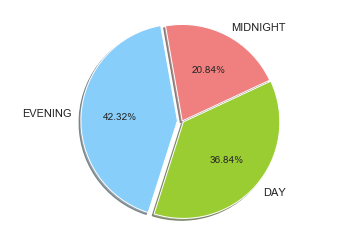

In [15]:
# Data to plot
labels = types
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.05, 0.015, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=100)
 
plt.axis('equal')
plt.show()

### Pie chart for weekday (Mon-Thurs), weekend (Fri-Sun)

In [16]:
import datetime
import pandas as pd

In [17]:
def format_date(date):
    '''Return date in Y-M-D'''
    epoch_time = str(date)[0: 10]
    return epoch_time

In [18]:
crime['date'] = crime[date_columnName].apply(format_date)
crime['date'] = pd.to_datetime(crime['date']).dt.date
crime['date'].head()

0    2017-02-06
1    2017-06-03
2    2017-04-07
3    2017-03-13
4    2017-01-08
Name: date, dtype: object

In [19]:
crime['day_of_week'] = crime['date'].apply(lambda x: x.weekday()) 

In [20]:
crime['day_of_week'].head()

0    0
1    5
2    4
3    0
4    6
Name: day_of_week, dtype: int64

In [21]:
def week_day(num):
    '''Return Weekday/Weekend'''
    if num < 4:
        return 'Weekday'
    if num >= 4:
        return 'Weekend'

In [22]:
crime['day'] = crime['day_of_week'].apply(week_day)

In [23]:
#Getting unique values for day
types = list(crime['day'].unique())
print(types)

['Weekday', 'Weekend']


In [24]:
#Frequency calculation of each day type
sizes = crime['day'].value_counts()
print(sizes)

Weekday    19202
Weekend    13880
Name: day, dtype: int64


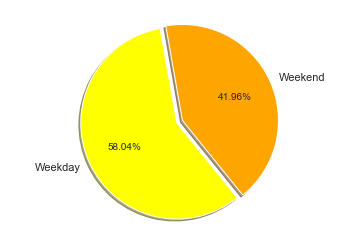

In [25]:
# Data to plot
labels = types
colors = ['yellow', 'orange']
explode = (0.05, 0.015)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=100)
 
plt.axis('equal')
plt.show()

### Histogram for crime frequency based on months

In [26]:
def month(date):
    '''Return month number'''
    return str(date)[5:7]

In [27]:
crime['month'] = crime['date'].apply(month)
crime['month'].head()

0    02
1    06
2    04
3    03
4    01
Name: month, dtype: object

In [28]:
crime_month = crime['month'].astype(int)
type(crime_month)

pandas.core.series.Series

Text(0, 0.5, 'Frequency')

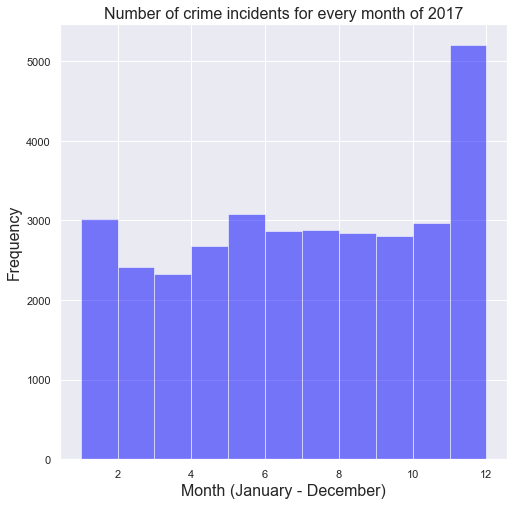

In [29]:
plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(crime_month, bins=[1,2,3,4,5,6,7,8,9,10,11,12], facecolor='blue', alpha=0.5)

plt.title("Number of crime incidents for every month of 2017", fontsize=16)
plt.xlabel("Month (January - December)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)